# 01: Exploratory Analysis:

In [ ]:
# ============================
# CELL 1 — DATA INGESTION
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

grid_system_df = pd.read_excel(
    "system-data-qtr-hourly-2025-v11-CORE.xlsx"
)

print("Raw shape:", grid_system_df.shape)
display(grid_system_df.head())


Raw shape: (35040, 37)


,DateTime,GMT Offset,NI Generation,NI Demand,NI Wind Availability,NI Wind Generation,NI Solar Availability,NI Solar Generation,Moyle I/C,NI Wind Penetration,NI Solar Penetration,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,EWIC I/C,IE Wind Penetration,IE Solar Penetration,AI Generation,AI Demand,AI Wind Availability,AI Wind Generation,AI Solar Availability,AI Solar Generation,AI Hydro,Inter-Jurisdictional Flow,AI Wind Penetration,AI Solar Penetration,AI Oversupply,AI Oversupply Percentage,SNSP,Unnamed: 34,Unnamed: 35,"For queries relating this report, please contact: RenewableReports@EirGrid.com\nNI: Northern Ireland \nIE: Ireland \nAI: All Island"
0,2025-01-01 00:00:00,0,735.578,523.431,940.638,148.940,3.752,0.0,261.246,0.284546,0.0,2662.29,3538.32,2415.68,1858.17,0.70,0.0,93.38,417.63,0.525156,0.0,3397.868,4061.751,3356.318,2007.110,4.452,0.0,93.38,-456.99,0.494149,0.0,0.0,0.0,0.6401,NaN,NaN,\nNotes: \nThe system data in this report is i...
1,2025-01-01 00:15:00,0,754.494,511.999,949.796,154.878,3.752,0.0,187.408,0.302497,0.0,2739.93,3503.78,2429.84,1953.50,0.67,0.0,93.88,346.57,0.557541,0.0,3494.424,4015.779,3379.636,2108.378,4.422,0.0,93.88,-414.21,0.525023,0.0,0.0,0.0,0.6353,NaN,NaN,NaN
2,2025-01-01 00:30:00,0,786.268,498.168,959.650,182.626,3.752,0.0,124.073,0.366595,0.0,2805.31,3472.97,2511.47,2021.62,0.71,0.0,93.60,273.35,0.582101,0.0,3591.578,3971.138,3471.120,2204.246,4.462,0.0,93.60,-397.41,0.555067,0.0,0.0,0.0,0.6318,NaN,NaN,NaN
3,2025-01-01 00:45:00,0,820.809,493.192,961.819,234.194,3.752,0.0,115.819,0.474854,0.0,2832.46,3443.98,2585.65,2078.36,0.65,0.0,93.52,294.66,0.603476,0.0,3653.269,3937.172,3547.469,2312.554,4.402,0.0,93.52,-429.89,0.587364,0.0,0.0,0.0,0.6481,NaN,NaN,NaN
4,2025-01-01 01:00:00,0,813.213,505.235,962.663,233.175,3.752,0.0,115.806,0.461518,0.0,2786.11,3418.98,2596.92,2025.03,0.65,0.0,93.24,369.67,0.592291,0.0,3599.323,3924.215,3559.583,2258.205,4.402,0.0,93.24,-411.39,0.575454,0.0,0.0,0.0,0.6503,NaN,NaN,NaN


In [ ]:
# ============================
# CELL 2 — DATA CLEANING & TIME INDEXING
# ============================

df = grid_system_df.copy()

# Remove unnamed/helper columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Parse DateTime and set as index
df["DateTime"] = pd.to_datetime(df["DateTime"], utc=True)
df = df.set_index("DateTime").sort_index()

# Enforce numeric types where possible
df = df.apply(pd.to_numeric, errors="ignore")

print("Cleaned shape:", df.shape)
display(df.head())


Cleaned shape: (35040, 34)


,GMT Offset,NI Generation,NI Demand,NI Wind Availability,NI Wind Generation,NI Solar Availability,NI Solar Generation,Moyle I/C,NI Wind Penetration,NI Solar Penetration,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,EWIC I/C,IE Wind Penetration,IE Solar Penetration,AI Generation,AI Demand,AI Wind Availability,AI Wind Generation,AI Solar Availability,AI Solar Generation,AI Hydro,Inter-Jurisdictional Flow,AI Wind Penetration,AI Solar Penetration,AI Oversupply,AI Oversupply Percentage,SNSP,"For queries relating this report, please contact: RenewableReports@EirGrid.com\nNI: Northern Ireland \nIE: Ireland \nAI: All Island"
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-01-01 00:00:00+00:00,0,735.578,523.431,940.638,148.940,3.752,0.0,261.246,0.284546,0.0,2662.29,3538.32,2415.68,1858.17,0.70,0.0,93.38,417.63,0.525156,0.0,3397.868,4061.751,3356.318,2007.110,4.452,0.0,93.38,-456.99,0.494149,0.0,0.0,0.0,0.6401,\nNotes: \nThe system data in this report is i...
2025-01-01 00:15:00+00:00,0,754.494,511.999,949.796,154.878,3.752,0.0,187.408,0.302497,0.0,2739.93,3503.78,2429.84,1953.50,0.67,0.0,93.88,346.57,0.557541,0.0,3494.424,4015.779,3379.636,2108.378,4.422,0.0,93.88,-414.21,0.525023,0.0,0.0,0.0,0.6353,NaN
2025-01-01 00:30:00+00:00,0,786.268,498.168,959.650,182.626,3.752,0.0,124.073,0.366595,0.0,2805.31,3472.97,2511.47,2021.62,0.71,0.0,93.60,273.35,0.582101,0.0,3591.578,3971.138,3471.120,2204.246,4.462,0.0,93.60,-397.41,0.555067,0.0,0.0,0.0,0.6318,NaN
2025-01-01 00:45:00+00:00,0,820.809,493.192,961.819,234.194,3.752,0.0,115.819,0.474854,0.0,2832.46,3443.98,2585.65,2078.36,0.65,0.0,93.52,294.66,0.603476,0.0,3653.269,3937.172,3547.469,2312.554,4.402,0.0,93.52,-429.89,0.587364,0.0,0.0,0.0,0.6481,NaN
2025-01-01 01:00:00+00:00,0,813.213,505.235,962.663,233.175,3.752,0.0,115.806,0.461518,0.0,2786.11,3418.98,2596.92,2025.03,0.65,0.0,93.24,369.67,0.592291,0.0,3599.323,3924.215,3559.583,2258.205,4.402,0.0,93.24,-411.39,0.575454,0.0,0.0,0.0,0.6503,NaN


In [ ]:
# ============================
# CELL 3 — BASIC DESCRIPTIVE STATISTICS (KEY METRICS)
# ============================

key_cols = [
    "AI Demand",
    "AI Generation",
    "AI Wind Generation",
    "AI Solar Generation",
    "SNSP"
]

stats = df[key_cols].describe().transpose()
display(stats)


,count,mean,std,min,25%,50%,75%,max
AI Demand,35040.0,4762.109260,778.109094,3192.2630,4126.28450,4737.3025,5286.0650,7492.6870
AI Generation,35040.0,4066.014833,858.926799,2035.8840,3430.18775,3999.7565,4599.3275,7779.7380
AI Wind Generation,35040.0,1555.258600,1094.063421,4.8800,616.06300,1361.9690,2342.5590,4678.8270
AI Solar Generation,35040.0,134.923683,208.137078,0.0000,0.18000,5.0800,208.9140,901.7630
SNSP,35040.0,0.505753,0.151245,0.0304,0.38530,0.5019,0.6458,0.7653


In [ ]:
# ============================
# CELL 4 — ENERGY ACCOUNTING (QUARTER-HOURLY → MWh / GWh)
# ============================

# Convert MW (15-min resolution) → MWh
energy_mwh = df[key_cols] * 0.25

total_demand_gwh = energy_mwh["AI Demand"].sum() / 1000
total_wind_gwh = energy_mwh["AI Wind Generation"].sum() / 1000
total_solar_gwh = energy_mwh["AI Solar Generation"].sum() / 1000

print(f"Total AI Demand: {total_demand_gwh:,.1f} GWh")
print(f"Total Wind Energy: {total_wind_gwh:,.1f} GWh")
print(f"Total Solar Energy: {total_solar_gwh:,.1f} GWh")


Total AI Demand: 41,716.1 GWh
Total Wind Energy: 13,624.1 GWh
Total Solar Energy: 1,181.9 GWh


In [ ]:
# ============================
# CELL 5 — RENEWABLE SHARE (INSTANTANEOUS + ENERGY-WEIGHTED)
# ============================

df["AI Renewable Share"] = (
    (df["AI Wind Generation"] + df["AI Solar Generation"]) / df["AI Demand"]
).replace([np.inf, -np.inf], np.nan)

energy_weighted_share = (
    (energy_mwh["AI Wind Generation"] + energy_mwh["AI Solar Generation"]).sum()
    / energy_mwh["AI Demand"].sum()
) * 100

print(f"Energy-weighted renewable share: {energy_weighted_share:.2f}%")
display(df["AI Renewable Share"].describe())


Energy-weighted renewable share: 35.49%


count    35040.000000
mean         0.357921
std          0.223585
min          0.005302
25%          0.168196
50%          0.328912
75%          0.521707
max          1.038728
Name: AI Renewable Share, dtype: float64

In [ ]:
# ============================
# CELL 6 — TEMPORAL AGGREGATION (NUMERIC ONLY)
# ============================

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Temporal aggregations
df_hourly = numeric_df.resample("H").mean()
df_daily = numeric_df.resample("D").mean()
df_monthly = numeric_df.resample("M").mean()

display(df_daily.head())


,GMT Offset,NI Generation,NI Demand,NI Wind Availability,NI Wind Generation,NI Solar Availability,NI Solar Generation,Moyle I/C,NI Wind Penetration,NI Solar Penetration,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,EWIC I/C,IE Wind Penetration,IE Solar Penetration,AI Generation,AI Demand,AI Wind Availability,AI Wind Generation,AI Solar Availability,AI Solar Generation,AI Hydro,Inter-Jurisdictional Flow,AI Wind Penetration,AI Solar Penetration,AI Oversupply,AI Oversupply Percentage,SNSP,AI Renewable Share
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-01-01 00:00:00+00:00,0.0,754.837052,725.891479,383.424917,162.238010,8.401083,3.076146,303.836823,0.257565,0.003709,3009.899167,3715.604167,1595.534271,1286.580625,40.139792,37.521771,111.860104,414.816667,0.364640,0.009514,3764.736219,4441.495646,1978.959187,1448.818635,48.540875,40.597917,111.860104,-319.567604,0.348299,0.008461,32.891573,0.009573,0.491332,0.356760
2025-01-02 00:00:00+00:00,0.0,789.942115,930.471271,102.950771,95.704719,8.106448,3.197823,398.639604,0.115450,0.002924,3664.734062,4340.691042,630.749167,607.853438,59.265104,56.856146,125.633750,478.321146,0.150586,0.012064,4454.676177,5271.162312,733.699938,703.558156,67.371552,60.053969,125.633750,-240.020521,0.144627,0.010342,0.000000,0.000000,0.300452,0.154969
2025-01-03 00:00:00+00:00,0.0,857.236385,930.070979,228.467885,170.177823,9.636021,4.427562,417.149292,0.187613,0.004050,3737.695000,4531.061146,397.857917,373.151771,56.104792,54.185938,136.181146,506.811146,0.086255,0.011105,4594.931385,5461.132125,626.325802,543.329594,65.740813,58.613500,136.181146,-328.479479,0.103536,0.009813,0.000000,0.000000,0.266475,0.113350
2025-01-04 00:00:00+00:00,0.0,823.023812,896.761833,119.121875,112.918958,7.130604,2.272469,331.452885,0.150984,0.002150,3754.426875,4375.070833,1059.702188,1027.386771,13.067500,13.134063,124.533854,414.221563,0.226831,0.002763,4577.450687,5271.832667,1178.824063,1140.305729,20.198104,15.406531,124.533854,-237.558854,0.211229,0.002652,0.000000,0.000000,0.336790,0.213882
2025-01-05 00:00:00+00:00,0.0,912.530813,836.202896,361.125448,280.879479,6.889125,0.670073,271.547687,0.326269,0.000667,3685.235833,4171.569583,2202.371667,2044.263229,8.049062,7.517604,122.006354,197.890625,0.497322,0.001672,4597.766646,5007.772479,2563.497115,2325.142708,14.938187,8.187677,122.006354,-333.608437,0.470668,0.001495,0.000000,0.000000,0.537582,0.472163


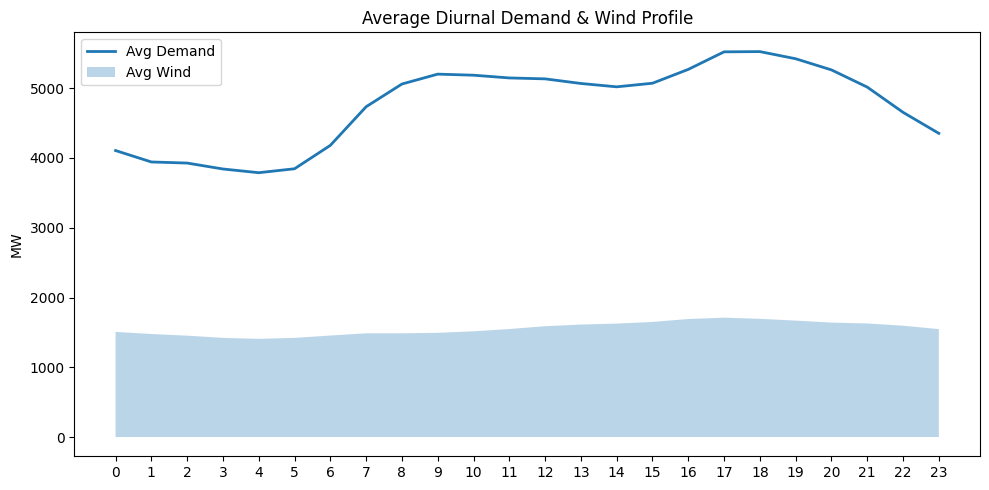

In [ ]:
# ============================
# CELL 7 — DIURNAL DEMAND & WIND PROFILE
# ============================

df["Hour"] = df.index.hour
diurnal = df.groupby("Hour")[["AI Demand", "AI Wind Generation"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(diurnal.index, diurnal["AI Demand"], label="Avg Demand", linewidth=2)
plt.fill_between(
    diurnal.index,
    0,
    diurnal["AI Wind Generation"],
    alpha=0.3,
    label="Avg Wind"
)
plt.xticks(range(0, 24))
plt.ylabel("MW")
plt.title("Average Diurnal Demand & Wind Profile")
plt.legend()
plt.tight_layout()
plt.show()


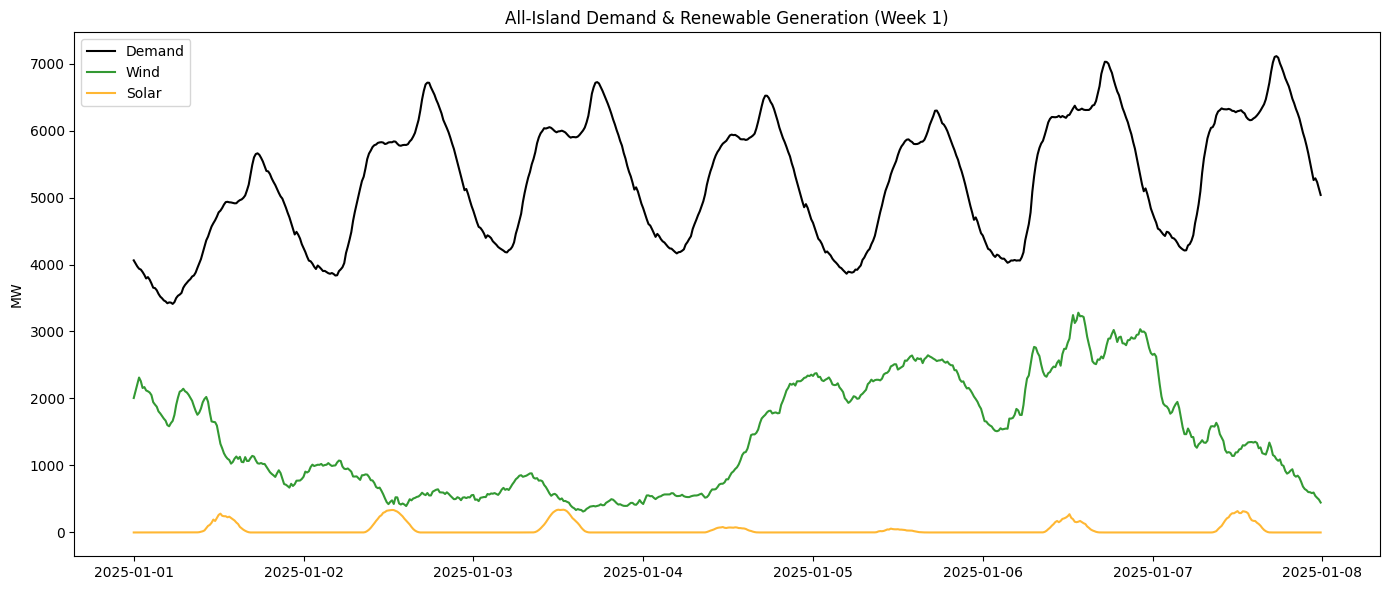

In [ ]:
# ============================
# CELL 8 — FIRST-WEEK SYSTEM BEHAVIOUR (TIME SERIES)
# ============================

week = df.iloc[:672]

plt.figure(figsize=(14, 6))
plt.plot(week.index, week["AI Demand"], label="Demand", color="black")
plt.plot(week.index, week["AI Wind Generation"], label="Wind", color="green", alpha=0.8)
plt.plot(week.index, week["AI Solar Generation"], label="Solar", color="orange", alpha=0.8)
plt.ylabel("MW")
plt.title("All-Island Demand & Renewable Generation (Week 1)")
plt.legend()
plt.tight_layout()
plt.show()


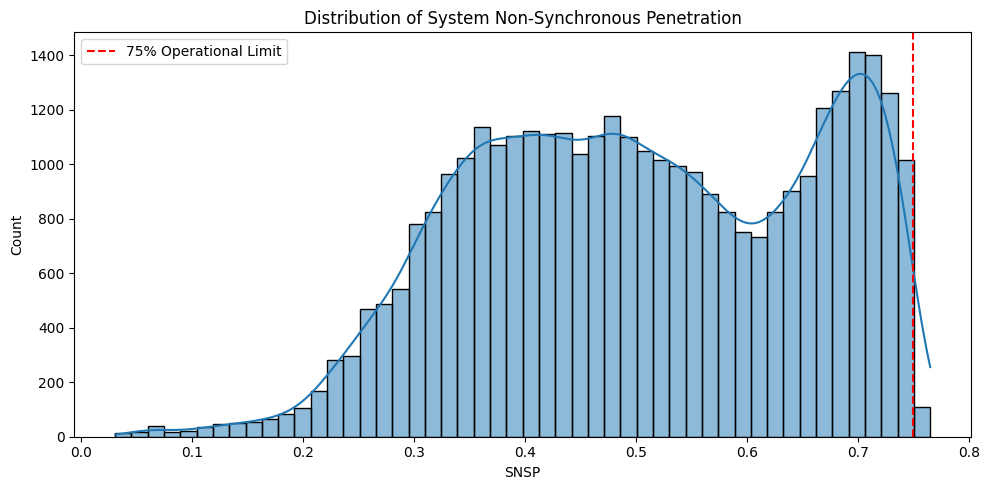

In [ ]:
# ============================
# CELL 9 — SNSP DISTRIBUTION & OPERATING REGIME
# ============================

plt.figure(figsize=(10, 5))
sns.histplot(df["SNSP"], bins=50, kde=True)
plt.axvline(0.75, color="red", linestyle="--", label="75% Operational Limit")
plt.xlabel("SNSP")
plt.title("Distribution of System Non-Synchronous Penetration")
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# ============================
# CELL 10 — DISPATCH DOWN / CURTAILMENT ANALYSIS
# ============================

df["AI Dispatch Down MW"] = df["AI Wind Availability"] - df["AI Wind Generation"]
df["AI Dispatch Down MW"] = df["AI Dispatch Down MW"].clip(lower=0)

dispatch_energy_gwh = (df["AI Dispatch Down MW"] * 0.25).sum() / 1000

print(f"Total wind dispatch-down energy: {dispatch_energy_gwh:,.2f} GWh")
display(df["AI Dispatch Down MW"].describe())


Total wind dispatch-down energy: 2,347.62 GWh


count    35040.000000
mean       267.993395
std        408.103702
min          0.000000
25%         29.922750
50%         61.825000
75%        332.043250
max       2958.080000
Name: AI Dispatch Down MW, dtype: float64

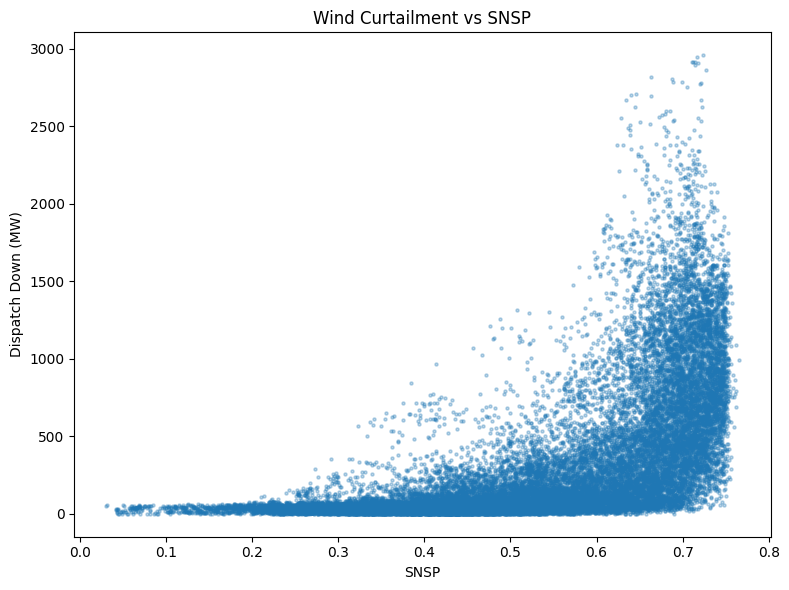

In [12]:
# ============================
# CELL 11 — DISPATCH DOWN VS SNSP RELATIONSHIP
# ============================

plt.figure(figsize=(8, 6))
plt.scatter(df["SNSP"], df["AI Dispatch Down MW"], alpha=0.3, s=5)
plt.xlabel("SNSP")
plt.ylabel("Dispatch Down (MW)")
plt.title("Wind Curtailment vs SNSP")
plt.tight_layout()
plt.show()


In [13]:
# ============================
# CELL 12 — NI + IE → AI CONSISTENCY CHECK
# ============================

metrics = [
    "Demand",
    "Generation",
    "Wind Generation",
    "Solar Generation"
]

results = []

for m in metrics:
    ni, ie, ai = f"NI {m}", f"IE {m}", f"AI {m}"
    if all(c in df.columns for c in [ni, ie, ai]):
        diff = (df[ni] + df[ie]) - df[ai]
        results.append({
            "Metric": m,
            "Max Abs Error (MW)": diff.abs().max(),
            "Mean Abs Error (MW)": diff.abs().mean()
        })

consistency_df = pd.DataFrame(results)
display(consistency_df)


,Metric,Max Abs Error (MW),Mean Abs Error (MW)
0,Demand,1895.7130,0.054101
1,Generation,1906.8895,0.054420
2,Wind Generation,1928.1075,0.055026
3,Solar Generation,0.0000,0.000000


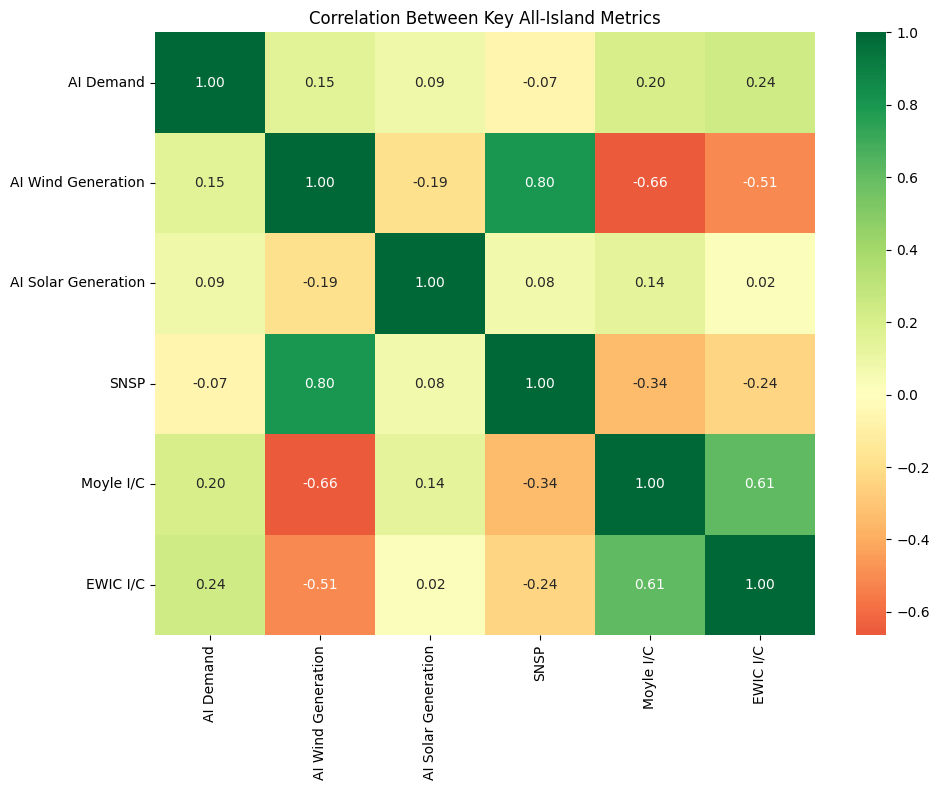

In [14]:
# ============================
# CELL 13 — CORRELATION STRUCTURE (SYSTEM INTERACTIONS)
# ============================

corr_cols = [
    "AI Demand",
    "AI Wind Generation",
    "AI Solar Generation",
    "SNSP",
    "Moyle I/C",
    "EWIC I/C"
]

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    center=0
)
plt.title("Correlation Between Key All-Island Metrics")
plt.tight_layout()
plt.show()


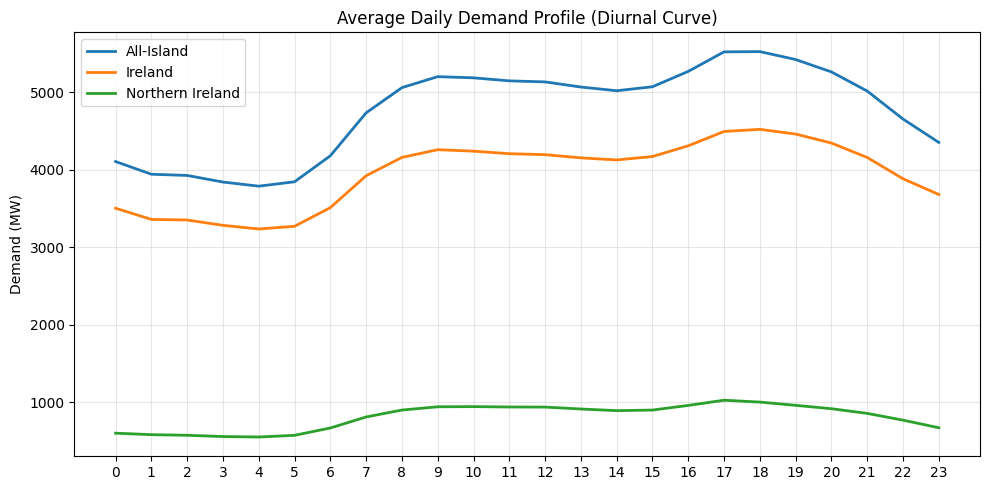

In [ ]:
# ============================
# CELL 14 — DIURNAL DEMAND PROFILE (PROPER AGGREGATION)
# ============================

# Create time features once
df["Hour"] = df.index.hour

diurnal_demand = (
    df.groupby("Hour")[["AI Demand", "IE Demand", "NI Demand"]]
    .mean()
)

plt.figure(figsize=(10, 5))
plt.plot(diurnal_demand.index, diurnal_demand["AI Demand"], label="All-Island", linewidth=2)
plt.plot(diurnal_demand.index, diurnal_demand["IE Demand"], label="Ireland", linewidth=2)
plt.plot(diurnal_demand.index, diurnal_demand["NI Demand"], label="Northern Ireland", linewidth=2)
plt.xticks(range(0, 24))
plt.ylabel("Demand (MW)")
plt.title("Average Daily Demand Profile (Diurnal Curve)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


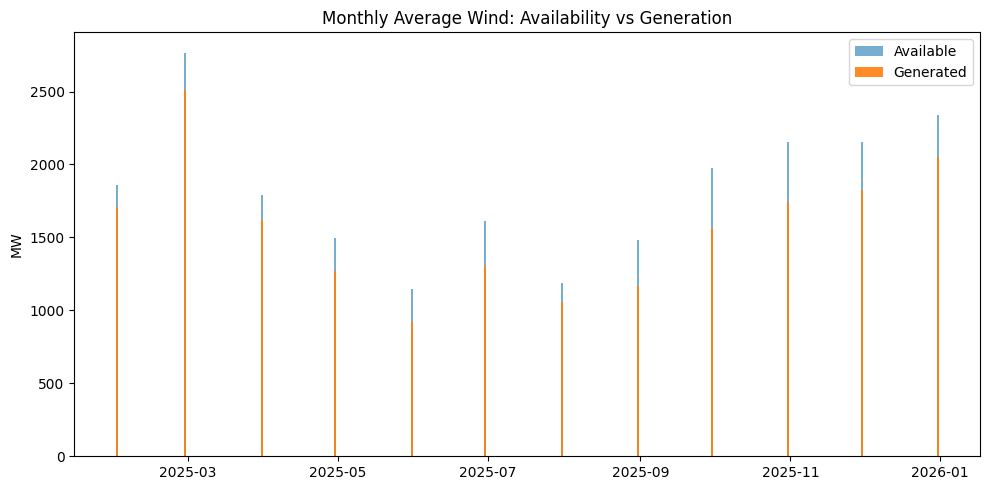

In [ ]:
# ============================
# CELL 15 — SEASONAL WIND: AVAILABILITY VS GENERATION
# ============================

# Numeric-only resampling
numeric_df = df.select_dtypes(include=[np.number])

monthly_wind = (
    numeric_df[["AI Wind Availability", "AI Wind Generation"]]
    .resample("M")
    .mean()
)

plt.figure(figsize=(10, 5))
plt.bar(monthly_wind.index, monthly_wind["AI Wind Availability"], label="Available", alpha=0.6)
plt.bar(monthly_wind.index, monthly_wind["AI Wind Generation"], label="Generated", alpha=0.9)
plt.ylabel("MW")
plt.title("Monthly Average Wind: Availability vs Generation")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# ============================
# CELL 16 — DISPATCH DOWN (CURTAILMENT) METRICS
# ============================

df["AI Dispatch Down MW"] = (
    df["AI Wind Availability"] - df["AI Wind Generation"]
).clip(lower=0)

df["Dispatch Down %"] = (
    df["AI Dispatch Down MW"] / df["AI Wind Availability"]
).replace([np.inf, -np.inf], np.nan)

display(df["AI Dispatch Down MW"].describe())


count    35040.000000
mean       267.993395
std        408.103702
min          0.000000
25%         29.922750
50%         61.825000
75%        332.043250
max       2958.080000
Name: AI Dispatch Down MW, dtype: float64

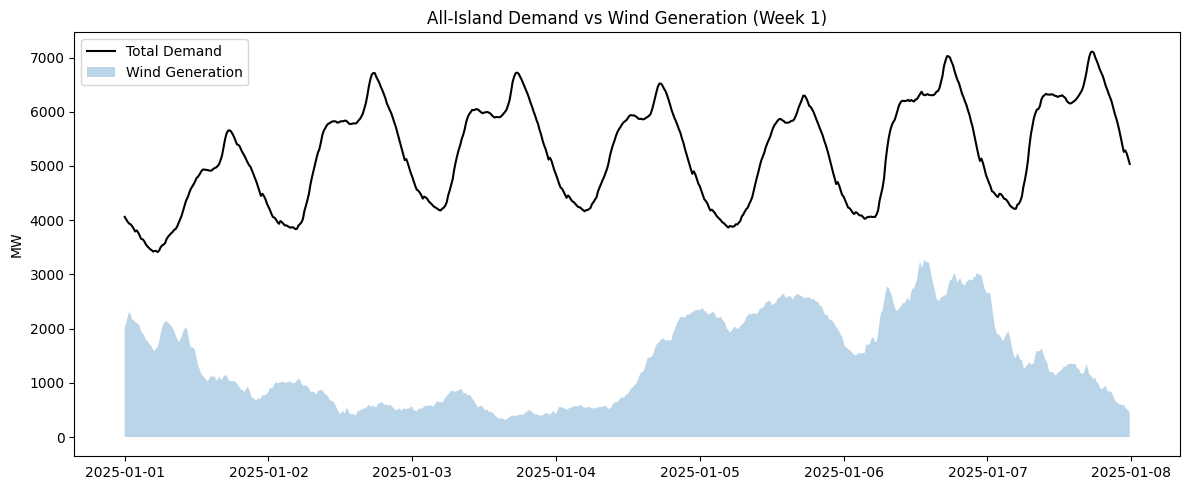

In [18]:
# ============================
# CELL 17 — DEMAND VS WIND (FIRST WEEK)
# ============================

week = df.iloc[:672]

plt.figure(figsize=(12, 5))
plt.plot(week.index, week["AI Demand"], label="Total Demand", color="black")
plt.fill_between(
    week.index,
    0,
    week["AI Wind Generation"],
    alpha=0.3,
    label="Wind Generation"
)
plt.ylabel("MW")
plt.title("All-Island Demand vs Wind Generation (Week 1)")
plt.legend()
plt.tight_layout()
plt.show()


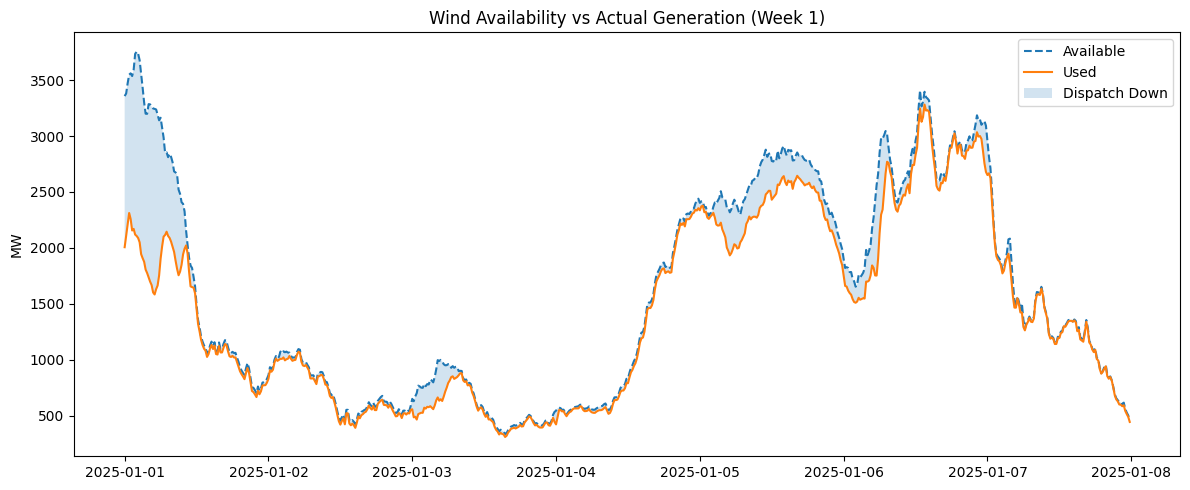

In [19]:
# ============================
# CELL 18 — WIND AVAILABILITY VS USED (FIRST WEEK)
# ============================

plt.figure(figsize=(12, 5))
plt.plot(week.index, week["AI Wind Availability"], label="Available", linestyle="--")
plt.plot(week.index, week["AI Wind Generation"], label="Used")
plt.fill_between(
    week.index,
    week["AI Wind Generation"],
    week["AI Wind Availability"],
    alpha=0.2,
    label="Dispatch Down"
)
plt.ylabel("MW")
plt.title("Wind Availability vs Actual Generation (Week 1)")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# ============================
# CELL 19 — PEAK NET DEMAND (SYSTEM STRESS MOMENT)
# ============================

df["Net Demand"] = (
    df["AI Demand"]
    - df["AI Wind Generation"]
    - df["AI Solar Generation"]
)

stress_time = df["Net Demand"].idxmax()

print("Peak stress timestamp:", stress_time)
print("Total Demand (MW):", df.loc[stress_time, "AI Demand"])
print("Wind (MW):", df.loc[stress_time, "AI Wind Generation"])
print("Net Demand (MW):", df.loc[stress_time, "Net Demand"])


Peak stress timestamp: 2025-01-09 17:30:00+00:00
Total Demand (MW): 7438.414000000001
Wind (MW): 141.324
Net Demand (MW): 7297.090000000001


Moyle Net Flow (GWh): 2174.0
EWIC Net Flow (GWh): 1695.8


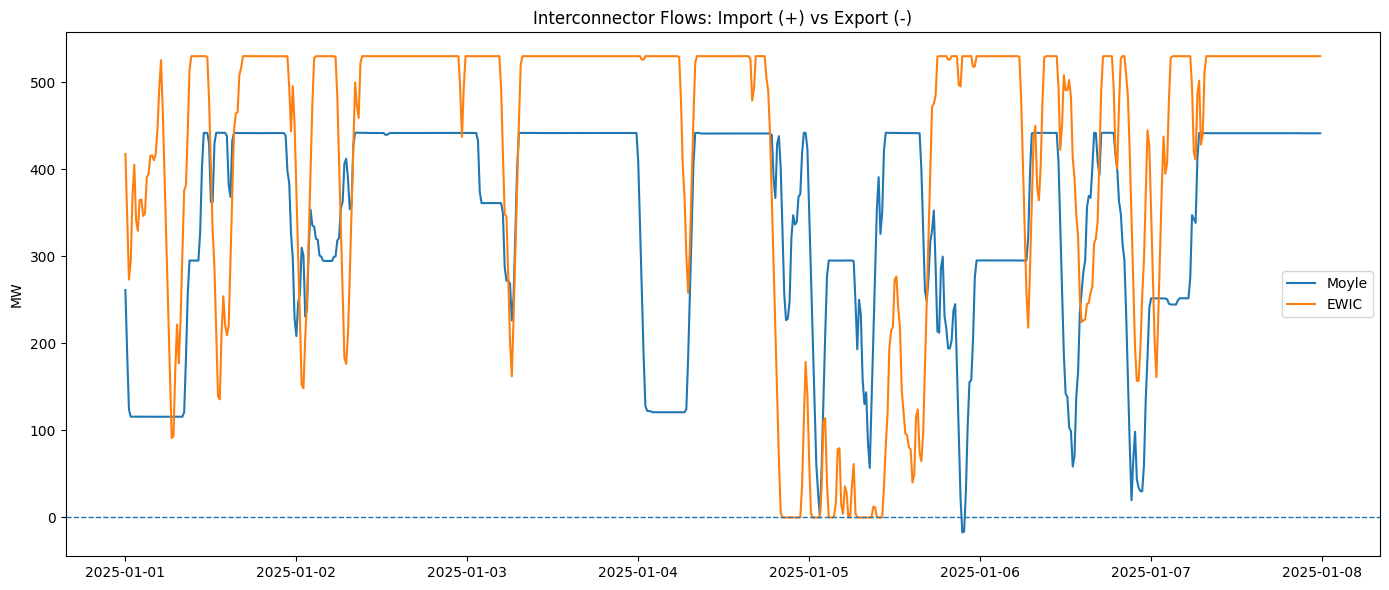

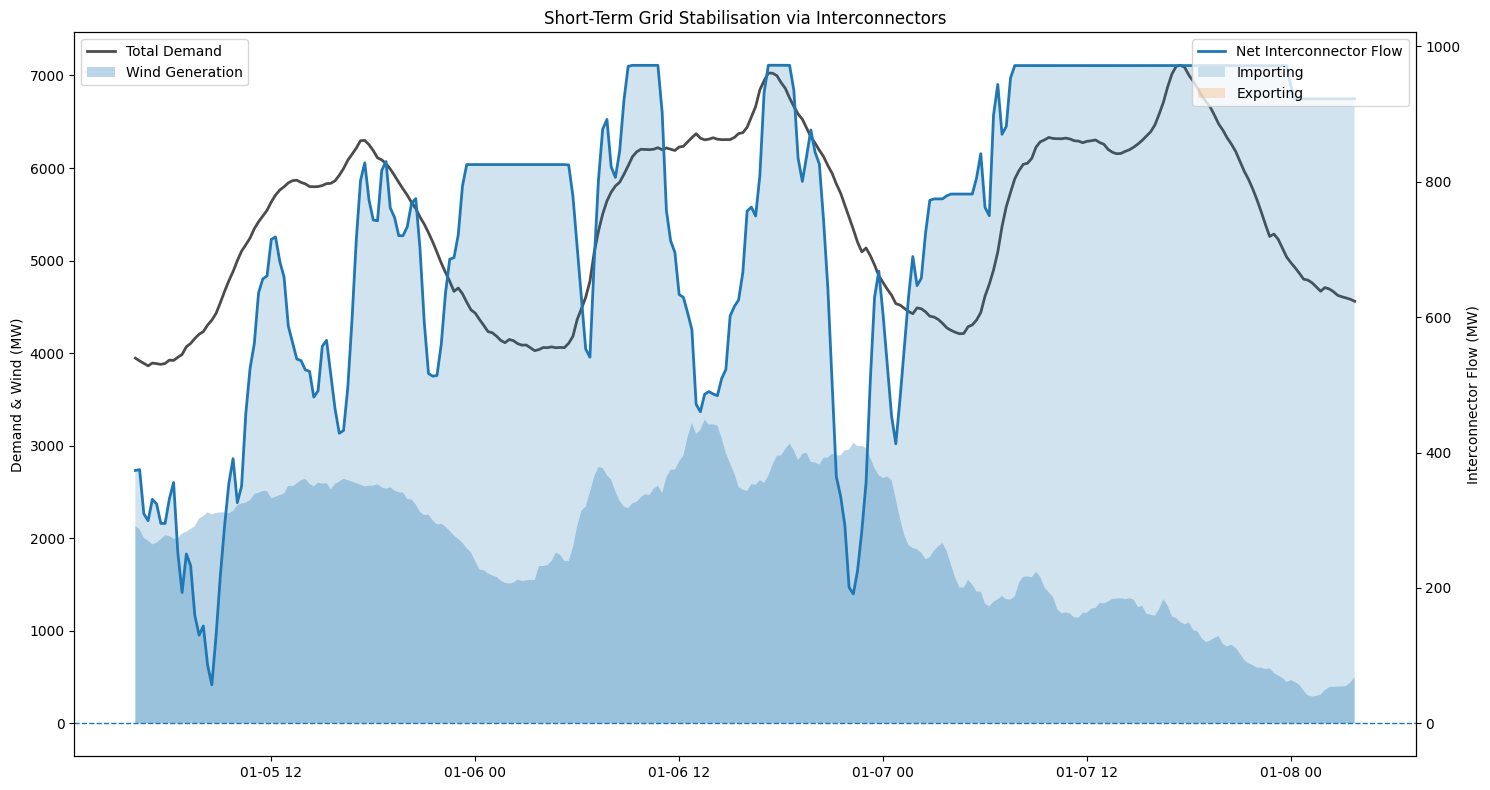

Correlation (Net Demand vs Interconnector Flow): 0.729


In [21]:
# ============================
# CELL 20 — INTERCONNECTOR ANALYSIS
# ============================

moyle_gwh = df["Moyle I/C"].sum() * 0.25 / 1000
ewic_gwh = df["EWIC I/C"].sum() * 0.25 / 1000

print("Moyle Net Flow (GWh):", round(moyle_gwh, 1))
print("EWIC Net Flow (GWh):", round(ewic_gwh, 1))


plt.figure(figsize=(14, 6))
plt.plot(week.index, week["Moyle I/C"], label="Moyle")
plt.plot(week.index, week["EWIC I/C"], label="EWIC")
plt.axhline(0, linestyle="--", linewidth=1)

plt.ylabel("MW")
plt.title("Interconnector Flows: Import (+) vs Export (-)")
plt.legend()
plt.tight_layout()
plt.show()

# ============================
# COMBINED INTERCONNECTOR FLOW & NET DEMAND
# ============================

# Combined interconnector flow (Import > 0, Export < 0)
df["Total IC Flow"] = df["Moyle I/C"] + df["EWIC I/C"]

# Net demand (what wind + solar cannot supply)
df["Net Demand"] = (
    df["AI Demand"]
    - df["AI Wind Generation"]
    - df["AI Solar Generation"]
)

# ============================
# GRID STABILISATION SNAPSHOT (3-DAY HIGH-RESOLUTION VIEW)
# ============================

# 3-day window (96 intervals per day)
sample = df.iloc[400:688]

fig, ax1 = plt.subplots(figsize=(15, 8))

# Axis 1: Demand & Wind
ax1.plot(sample.index, sample["AI Demand"], label="Total Demand", linewidth=2, color="black", alpha=0.7)
ax1.fill_between(
    sample.index,
    0,
    sample["AI Wind Generation"],
    alpha=0.3,
    label="Wind Generation"
)
ax1.set_ylabel("Demand & Wind (MW)")
ax1.legend(loc="upper left")

# Axis 2: Interconnectors
ax2 = ax1.twinx()
ax2.plot(
    sample.index,
    sample["Total IC Flow"],
    label="Net Interconnector Flow",
    linewidth=2
)
ax2.axhline(0, linestyle="--", linewidth=1)

ax2.fill_between(
    sample.index,
    0,
    sample["Total IC Flow"],
    where=(sample["Total IC Flow"] > 0),
    alpha=0.2,
    label="Importing"
)
ax2.fill_between(
    sample.index,
    0,
    sample["Total IC Flow"],
    where=(sample["Total IC Flow"] < 0),
    alpha=0.2,
    label="Exporting"
)

ax2.set_ylabel("Interconnector Flow (MW)")
ax2.legend(loc="upper right")

plt.title("Short-Term Grid Stabilisation via Interconnectors")
plt.tight_layout()
plt.show()

# ============================
# COMBINED INTERCONNECTOR FLOW & NET DEMAND
# ============================

# Combined interconnector flow (Import > 0, Export < 0)
df["Total IC Flow"] = df["Moyle I/C"] + df["EWIC I/C"]

# Net demand (what wind + solar cannot supply)
df["Net Demand"] = (
    df["AI Demand"]
    - df["AI Wind Generation"]
    - df["AI Solar Generation"]
)

# ============================
# STABILISATION CORRELATION (NET DEMAND VS INTERCONNECTORS)
# ============================

stabilisation_corr = df["Net Demand"].corr(df["Total IC Flow"])
print(f"Correlation (Net Demand vs Interconnector Flow): {stabilisation_corr:.3f}")

In [ ]:
# ============================
# FINAL CELL — SAVE STAGE 1 SYSTEM STATE
# ============================

stage1_system_state = df[
    [
        "AI Demand",
        "AI Wind Availability",
        "AI Wind Generation",
        "AI Solar Generation",
        "SNSP",
        "AI Oversupply",
        "Moyle I/C",
        "EWIC I/C",
        "Inter-Jurisdictional Flow"
    ]
].copy()

stage1_system_state = stage1_system_state.sort_index()
stage1_system_state.to_csv("stage1_system_state_2025.csv")
print("Stage 1 artefact saved: stage1_system_state_2025.csv")

Stage 1 artefact saved: stage1_system_state_2025.csv
